<a href="https://colab.research.google.com/github/Agricultura-e-Clima-India/pipeline/blob/main/pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Final Pipeline de Dados: Agricultura na Índia

Imports necessários

In [45]:
import kagglehub
import matplotlib
import pandas as pd
import numpy as np
import os

Import dos dados de produção da Índia, produção estatística da Índia, dados climáticos do planeta, dados climáticos da Índia

In [46]:
def carregar_dataset_kaggle(handle_dataset: str, nome_arquivo_csv: str = None):
    """
    Baixa um dataset do Kaggle Hub e carrega um arquivo CSV específico em um DataFrame.
    Se nome_arquivo_csv não for especificado, carrega o primeiro CSV encontrado.
    """
    print(f"--- Iniciando carregamento de: {handle_dataset} ---")
    try:
        caminho_pasta = kagglehub.dataset_download(handle_dataset)

        # Se um nome de arquivo específico foi fornecido
        if nome_arquivo_csv:
            caminho_completo = os.path.join(caminho_pasta, nome_arquivo_csv)
            if not os.path.exists(caminho_completo):
                print(f"ERRO: O arquivo '{nome_arquivo_csv}' não foi encontrado na pasta do dataset.")
                # Opcional: listar arquivos disponíveis para ajudar a depurar
                print(f"Arquivos disponíveis: {os.listdir(caminho_pasta)}")
                return None
            nome_csv_final = nome_arquivo_csv
        # Se nenhum nome foi fornecido, usa a lógica original
        else:
            arquivos_csv = [f for f in os.listdir(caminho_pasta) if f.endswith('.csv')]
            if not arquivos_csv:
                print(f"AVISO: Nenhum arquivo .csv encontrado para '{handle_dataset}'.")
                return None
            nome_csv_final = arquivos_csv[0]
            caminho_completo = os.path.join(caminho_pasta, nome_csv_final)

        print(f"Arquivo encontrado: '{nome_csv_final}'. Lendo os dados...")
        # Adicionado tratamento para possíveis erros de codificação e linhas mal formatadas
        df = pd.read_csv(caminho_completo, encoding='utf-8-sig', on_bad_lines='skip')

        print(f"--> Dataset '{handle_dataset}' (arquivo: {nome_csv_final}) carregado com sucesso!\n")
        return df

    except Exception as e:
        print(f"ERRO ao carregar o dataset '{handle_dataset}': {e}\n")
        return None

In [47]:
df_estatisticas = carregar_dataset_kaggle("nikhilmahajan29/crop-production-statistics-india")

--- Iniciando carregamento de: nikhilmahajan29/crop-production-statistics-india ---
Using Colab cache for faster access to the 'crop-production-statistics-india' dataset.
Arquivo encontrado: 'APY.csv'. Lendo os dados...
--> Dataset 'nikhilmahajan29/crop-production-statistics-india' (arquivo: APY.csv) carregado com sucesso!



In [48]:
df_clima_planeta = carregar_dataset_kaggle("berkeleyearth/climate-change-earth-surface-temperature-data", nome_arquivo_csv="GlobalLandTemperaturesByCity.csv")

df_clima_planeta_India = df_clima_planeta[df_clima_planeta['Country'] == 'India']

--- Iniciando carregamento de: berkeleyearth/climate-change-earth-surface-temperature-data ---
Using Colab cache for faster access to the 'climate-change-earth-surface-temperature-data' dataset.
Arquivo encontrado: 'GlobalLandTemperaturesByCity.csv'. Lendo os dados...
--> Dataset 'berkeleyearth/climate-change-earth-surface-temperature-data' (arquivo: GlobalLandTemperaturesByCity.csv) carregado com sucesso!



In [49]:
df_chuva_india = carregar_dataset_kaggle("swarooprangle/indian-agriculture-and-climate-dataset-1961-2018", nome_arquivo_csv="data/rainfall.csv")

df_temp_india = carregar_dataset_kaggle("swarooprangle/indian-agriculture-and-climate-dataset-1961-2018", nome_arquivo_csv="data/temperature.csv")

df_clima_india = pd.merge(df_chuva_india, df_temp_india, on=['YEAR'])


--- Iniciando carregamento de: swarooprangle/indian-agriculture-and-climate-dataset-1961-2018 ---
Using Colab cache for faster access to the 'indian-agriculture-and-climate-dataset-1961-2018' dataset.
Arquivo encontrado: 'data/rainfall.csv'. Lendo os dados...
--> Dataset 'swarooprangle/indian-agriculture-and-climate-dataset-1961-2018' (arquivo: data/rainfall.csv) carregado com sucesso!

--- Iniciando carregamento de: swarooprangle/indian-agriculture-and-climate-dataset-1961-2018 ---
Using Colab cache for faster access to the 'indian-agriculture-and-climate-dataset-1961-2018' dataset.
Arquivo encontrado: 'data/temperature.csv'. Lendo os dados...
--> Dataset 'swarooprangle/indian-agriculture-and-climate-dataset-1961-2018' (arquivo: data/temperature.csv) carregado com sucesso!



Informação dos DataFrames Carregados:

In [51]:
print("\n### Informação de df_estatisticas (Crop Production Statistics):")
print(df_estatisticas.head())
df_estatisticas.info()


### Informação de df_estatisticas (Crop Production Statistics):
                        State District       Crop  Crop_Year       Season  \
0  Andaman and Nicobar Island  NICOBARS  Arecanut       2007  Kharif        
1  Andaman and Nicobar Island  NICOBARS  Arecanut       2007  Rabi          
2  Andaman and Nicobar Island  NICOBARS  Arecanut       2008  Autumn        
3  Andaman and Nicobar Island  NICOBARS  Arecanut       2008  Summer        
4  Andaman and Nicobar Island  NICOBARS  Arecanut       2009  Autumn        

    Area   Production  Yield  
0  2439.6      3415.0   1.40  
1  1626.4      2277.0   1.40  
2  4147.0      3060.0   0.74  
3  4147.0      2660.0   0.64  
4  4153.0      3120.0   0.75  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345336 entries, 0 to 345335
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   State       345336 non-null  object 
 1   District    345336 non-null  object 
 2   Cro

In [52]:
print("\n### Informação de df_clima_planeta_India (Climate Change Earth Surface Temperature):")
print(df_clima_planeta_India.head())
df_clima_planeta.info()


### Informação de df_clima_planeta_India (Climate Change Earth Surface Temperature):
               dt  AverageTemperature  AverageTemperatureUncertainty    City  \
49880  1816-03-01              19.934                          2.258  Abohar   
49881  1816-04-01              26.641                          3.398  Abohar   
49882  1816-05-01              32.535                          2.408  Abohar   
49883  1816-06-01              33.254                          2.123  Abohar   
49884  1816-07-01              31.105                          1.848  Abohar   

      Country Latitude Longitude  
49880   India   29.74N    73.85E  
49881   India   29.74N    73.85E  
49882   India   29.74N    73.85E  
49883   India   29.74N    73.85E  
49884   India   29.74N    73.85E  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                

In [53]:
print("\n### Informação de df_clima_india (Indian Agriculture and Climate):")
print(df_clima_india.head())
df_clima_india.info()


### Informação de df_clima_india (Indian Agriculture and Climate):
   YEAR   JAN   FEB   MAR   APR   MAY    JUN    JUL    AUG    SEP  ...  \
0  1961  26.1  34.8  26.0  28.5  77.6  192.9  336.6  287.6  234.9  ...   
1  1962  12.6  21.6  16.0  43.6  70.8  137.1  281.6  276.9  211.0  ...   
2  1963   6.8   9.8  41.7  50.6  60.9  168.0  258.6  316.7  164.9  ...   
3  1964  18.6  14.1  19.0  40.0  52.1  177.2  345.7  273.7  200.4  ...   
4  1965  11.8  28.1  26.7  45.1  52.7  116.1  270.1  192.8  129.5  ...   

      ANN  Jan-Feb  Mar-May  Jun-Sep  Oct-Dec  ANNUAL  JAN-FEB  MAR-MAY  \
0  1399.2     60.9    132.1   1052.0    154.2   24.00    18.98    26.11   
1  1198.0     34.3    130.4    906.6    126.7   24.04    18.91    25.91   
2  1220.9     16.6    153.1    908.2    142.9   24.15    19.07    25.57   
3  1244.4     32.7    111.1    997.0    103.5   24.10    18.83    26.38   
4   947.4     39.9    124.6    708.5     74.4   24.07    19.22    25.24   

   JUN-SEP  OCT-DEC  
0    27.06    

Análise Descritiva dos DataFrames Carregados:

In [54]:
print("\n### Descrição de df_estatisticas (Crop Production Statistics):")
print(df_estatisticas.describe())


### Descrição de df_estatisticas (Crop Production Statistics):
           Crop_Year         Area     Production          Yield
count  345336.000000  3.453360e+05  3.403880e+05  345336.000000
mean     2008.887512  1.167147e+04  9.584726e+05      79.423135
std         6.564361  4.584079e+04  2.153068e+07     916.678396
min      1997.000000  4.000000e-03  0.000000e+00       0.000000
25%      2003.000000  7.400000e+01  8.700000e+01       0.550000
50%      2009.000000  5.320000e+02  7.170000e+02       1.000000
75%      2015.000000  4.112000e+03  7.182000e+03       2.470000
max      2020.000000  8.580100e+06  1.597800e+09   43958.330000


In [55]:
print("\n### Descrição de df_clima_planeta (Climate Change Earth Surface Temperature):")
print(df_clima_planeta_India.describe())


### Descrição de df_clima_planeta (Climate Change Earth Surface Temperature):
       AverageTemperature  AverageTemperatureUncertainty
count       960548.000000                  960548.000000
mean            25.429224                       0.932310
std              5.130301                       0.814163
min             -5.045000                       0.051000
25%             22.484000                       0.359000
50%             26.314000                       0.568000
75%             29.037000                       1.415000
max             37.522000                       7.781000


In [56]:
print("\n### Descrição de df_clima_india (Indian Agriculture and Climate):")
print(df_clima_india.describe())


### Descrição de df_clima_india (Indian Agriculture and Climate):
              YEAR        JAN        FEB        MAR        APR         MAY  \
count    58.000000  58.000000  58.000000  58.000000  58.000000   58.000000   
mean   1989.500000  16.815517  23.437931  28.877586  38.174138   62.256897   
std      16.886879   6.313000   9.214421  11.729600   9.665104   14.084857   
min    1961.000000   1.700000   8.800000   8.800000  19.300000   31.700000   
25%    1975.250000  12.625000  15.600000  20.350000  30.800000   53.100000   
50%    1989.500000  16.100000  24.000000  28.050000  37.500000   60.650000   
75%    2003.750000  20.475000  28.050000  35.500000  43.775000   70.000000   
max    2018.000000  31.300000  45.600000  63.300000  68.300000  112.900000   

              JUN         JUL         AUG         SEP  ...          ANN  \
count   58.000000   58.000000   58.000000   58.000000  ...    58.000000   
mean   166.043103  282.324138  256.698276  168.686207  ...  1161.181034   
std  

## Combinando os DataFrames
Vamos começar combinando os dados de produção e clima.


In [64]:
df_producao_final = df_estatisticas.copy()
df_producao_final.rename(columns={'Crop_Year': 'YEAR'}, inplace=True)

# Juntando o DataFrame de produção com o de clima usando a coluna 'YEAR'
df_final_combinado = pd.merge(
    df_producao_final,
    df_clima_india,
    on='YEAR',  # Chave da junção
    how='inner' # 'inner' garante que só manteremos os anos presentes em AMBOS os dataframes
)

df_final_combinado.rename(columns={'Area ': 'Area'}, inplace=True)

print("Merge realizado com sucesso!")
print("Dimensões do novo DataFrame:", df_final_combinado.shape)
print("\nColunas do DataFrame combinado:")
print(df_final_combinado.columns)
print("\nExemplo do DataFrame final:")
print(df_final_combinado.head())

Merge realizado com sucesso!
Dimensões do novo DataFrame: (325753, 30)

Colunas do DataFrame combinado:
Index(['State', 'District ', 'Crop', 'YEAR', 'Season', 'Area', 'Production',
       'Yield', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC', 'ANN', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec',
       'ANNUAL', 'JAN-FEB', 'MAR-MAY', 'JUN-SEP', 'OCT-DEC'],
      dtype='object')

Exemplo do DataFrame final:
                        State District       Crop  YEAR       Season    Area  \
0  Andaman and Nicobar Island  NICOBARS  Arecanut  2007  Kharif       2439.6   
1  Andaman and Nicobar Island  NICOBARS  Arecanut  2007  Rabi         1626.4   
2  Andaman and Nicobar Island  NICOBARS  Arecanut  2008  Autumn       4147.0   
3  Andaman and Nicobar Island  NICOBARS  Arecanut  2008  Summer       4147.0   
4  Andaman and Nicobar Island  NICOBARS  Arecanut  2009  Autumn       4153.0   

   Production  Yield   JAN   FEB  ...     ANN  Jan-Feb  Mar-May  Ju

In [65]:
# Selecionar colunas numéricas relevantes
colunas_analise = ['Area', 'Production', 'Yield', 'ANN', 'ANNUAL']

# Clean column names by removing trailing spaces
df_final_combinado.columns = df_final_combinado.columns.str.strip()

# Recalculate the correlation matrix
correlacao = df_final_combinado[colunas_analise].corr()

print("Matriz de Correlação:")
print(correlacao)

# Foco na correlação com a Produtividade (Yield)
print("\nCorrelação com a Produtividade (Yield):")
print(correlacao['Yield'].sort_values(ascending=False))

Matriz de Correlação:
                Area  Production     Yield       ANN    ANNUAL
Area        1.000000    0.048038  0.000223  0.003515 -0.024150
Production  0.048038    1.000000  0.437100 -0.000979  0.001769
Yield       0.000223    0.437100  1.000000 -0.001881  0.004820
ANN         0.003515   -0.000979 -0.001881  1.000000  0.003038
ANNUAL     -0.024150    0.001769  0.004820  0.003038  1.000000

Correlação com a Produtividade (Yield):
Yield         1.000000
Production    0.437100
ANNUAL        0.004820
Area          0.000223
ANN          -0.001881
Name: Yield, dtype: float64


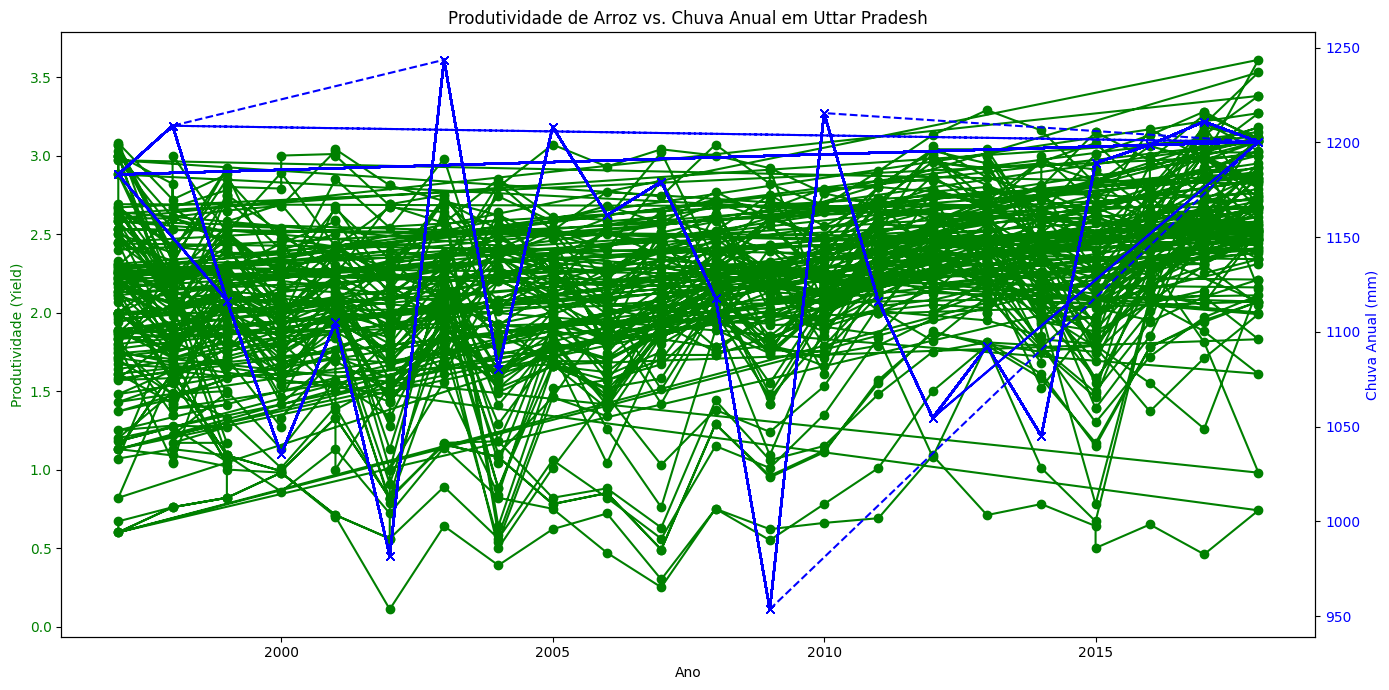

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar para um estado e cultura específicos para uma análise clara
df_analise_especifica = df_final_combinado[
    (df_final_combinado['State'] == 'Uttar Pradesh') &
    (df_final_combinado['Crop'] == 'Rice')
]

# Criar o gráfico
fig, ax1 = plt.subplots(figsize=(14, 7))

# Eixo 1: Produtividade do Arroz
ax1.set_xlabel('Ano')
ax1.set_ylabel('Produtividade (Yield)', color='g')
ax1.plot(df_analise_especifica['YEAR'], df_analise_especifica['Yield'], color='g', marker='o', label='Produtividade de Arroz')
ax1.tick_params(axis='y', labelcolor='g')

# Eixo 2: Chuva Anual
ax2 = ax1.twinx()  # Criar um segundo eixo Y
ax2.set_ylabel('Chuva Anual (mm)', color='b')
ax2.plot(df_analise_especifica['YEAR'], df_analise_especifica['ANN'], color='b', marker='x', linestyle='--', label='Chuva Anual')
ax2.tick_params(axis='y', labelcolor='b')

plt.title('Produtividade de Arroz vs. Chuva Anual em Uttar Pradesh')
fig.tight_layout()
plt.show()